## DECIDING WHERE TO LIVE


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df=pd.read_csv("cpmadrid2.csv", sep=';', decimal=',', encoding='ANSI')

In [5]:

df

,Barrio,CP,Lon,Lat
0,CASTELLANA,28001,-3.681086,40.429061
1,CIUDAD JARDIN,28002,-3.666369,40.451381
2,ALMAGRO,28003,-3.699867,40.438308
3,ALMAGRO,28004,-3.695542,40.428072
4,ACACIAS,28005,-3.703536,40.404592
5,CASTELLANA,28006,-3.680981,40.430419
6,ADELFAS,28007,-3.673142,40.402025
7,ARGUELLES,28008,-3.717186,40.431500
8,GOYA,28009,-3.680008,40.422697
9,ALMAGRO,28010,-3.692111,40.426914


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON filesmadrid


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [7]:
address = 'Madrid, MAD'

geolocator = Nominatim(user_agent="mad_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Madrid are 40.4948384, -3.5740806206811313.


In [8]:
map_madrid = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, cp, poblacion in zip(df['Lat'], df['Lon'], df['CP'], df['Barrio']):
    label = '{}, {}'.format(cp, poblacion)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  
    
map_madrid

In [9]:
CLIENT_ID = '4EKZNCJH15FZNCY3ZT3AG413NA1C2HXJ4N24ZU3MZ2KTGY5Z' # your Foursquare ID
CLIENT_SECRET = 'NWCUT1M4YTQO5GOSQYSC0EBXR1YS0B1SKDXYBY4GEWFTQZST' # your Foursquare Secret
ACCESS_TOKEN = 'JJVB53CAXWPO13NTWYBK4NBPNTYHIWOFHGY23KIULE5DVQY5' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4EKZNCJH15FZNCY3ZT3AG413NA1C2HXJ4N24ZU3MZ2KTGY5Z
CLIENT_SECRET:NWCUT1M4YTQO5GOSQYSC0EBXR1YS0B1SKDXYBY4GEWFTQZST


In [10]:
neighborhood_latitude = df.loc[0, 'Lat'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Lon'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'CP'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 28001 are 40.42906111, -3.681086111.


In [11]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
LIMIT = 10000 # limit of number of venues returned by Foursquare API


radius = 500 # define radius


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=4EKZNCJH15FZNCY3ZT3AG413NA1C2HXJ4N24ZU3MZ2KTGY5Z&client_secret=NWCUT1M4YTQO5GOSQYSC0EBXR1YS0B1SKDXYBY4GEWFTQZST&v=20180604&ll=40.42906111,-3.681086111&radius=500&limit=10000'

In [13]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6038108b9f7b3248b3d44611'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Castellana',
  'headerFullLocation': 'Castellana, Madrid',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 79,
  'suggestedBounds': {'ne': {'lat': 40.4335611145, 'lng': -3.6751854980648786},
   'sw': {'lat': 40.4245611055, 'lng': -3.6869867239351213}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c36648118e72d7fa4c914f5',
       'name': 'Simposium',
       'location': {'address': 'Castelló',
        'lat': 40.42971386447936,
        'lng': -3.681068097097265,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.42971386447936,
        

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Simposium,Lounge,40.429714,-3.681068
1,Fundación Juan March,Art Gallery,40.431018,-3.681080
2,Bienmesabe,Tapas Restaurant,40.429144,-3.679790
3,Plaza del Marqués de Salamanca,Plaza,40.429605,-3.679751
4,Mallorca,Bakery,40.429077,-3.683929


In [15]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

79 venues were returned by Foursquare.


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
madrid_data=df
madrid_venues = getNearbyVenues(names=madrid_data['CP'],
                                   latitudes=madrid_data['Lat'],
                                   longitudes=madrid_data['Lon']
                                  )

28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28108
28760
28914
28917
28925


In [18]:
print(madrid_venues.shape)
madrid_venues.head()

(1796, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,28001,40.429061,-3.681086,Simposium,40.429714,-3.681068,Lounge
1,28001,40.429061,-3.681086,Fundación Juan March,40.431018,-3.681080,Art Gallery
2,28001,40.429061,-3.681086,Bienmesabe,40.429144,-3.679790,Tapas Restaurant
3,28001,40.429061,-3.681086,Plaza del Marqués de Salamanca,40.429605,-3.679751,Plaza
4,28001,40.429061,-3.681086,Mallorca,40.429077,-3.683929,Bakery


In [19]:
madrid_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
28001,79,79,79,79,79,79
28002,28,28,28,28,28,28
28003,48,48,48,48,48,48
28004,60,60,60,60,60,60
28005,100,100,100,100,100,100
28006,68,68,68,68,68,68
28007,57,57,57,57,57,57
28008,71,71,71,71,71,71
28009,100,100,100,100,100,100


In [20]:
print('There are {} uniques categories.'.format(len(madrid_venues['Venue Category'].unique())))

There are 210 uniques categories.


In [21]:
madrid_onehot = pd.get_dummies(madrid_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
madrid_onehot['Neighborhood'] = madrid_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Café,Casino,Cheese Shop,Chinese Restaurant,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,Colombian Restaurant,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Shop,Donut Shop,Drive-in Theater,Dumpling Restaurant,Electronics Store,Embassy / Consulate,Escape Room,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Liquor Store,Lottery Retailer,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nightclub,North Indian Restaurant,Opera House,Other Nightlife,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Racetrack,Ramen Restaurant,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trade School,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,28001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,28001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
madrid_onehot.shape

(1796, 211)

In [23]:
madrid_grouped = madrid_onehot.groupby('Neighborhood').mean().reset_index()
madrid_grouped

,Neighborhood,Accessories Store,Adult Boutique,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Café,Casino,Cheese Shop,Chinese Restaurant,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,Colombian Restaurant,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Shop,Donut Shop,Drive-in Theater,Dumpling Restaurant,Electronics Store,Embassy / Consulate,Escape Room,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Liquor Store,Lottery Retailer,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nightclub,North Indian Restaurant,Opera House,Other Nightlife,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Racetrack,Ramen Restaurant,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trade School,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,28001,0.000000,0.000000,0.012658,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.037975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075949,0.000000,0.000000,0.000000,0.000000,0.0000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.037975,0.025316,0.050633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.012658,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.012658,0.00,0.0,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.012658,0.012658,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.050633,0.000000,0.00,0.012658,0.000000,0.00,0.000000,0.025316,0.000000,0.00,0.025316,0.012658,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.012658,0.00000

In [24]:
madrid_grouped.shape

(56, 211)

In [25]:
num_top_venues = 5

for hood in madrid_grouped['Neighborhood']:
    print(hood)
    temp = madrid_grouped[madrid_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

28001
                venue  freq
0  Spanish Restaurant  0.13
1          Restaurant  0.08
2    Tapas Restaurant  0.08
3            Boutique  0.08
4               Hotel  0.05


28002
                       venue  freq
0         Seafood Restaurant  0.14
1           Tapas Restaurant  0.07
2                       Café  0.07
3                     Bakery  0.07
4  Middle Eastern Restaurant  0.04


28003
                venue  freq
0  Spanish Restaurant  0.19
1    Tapas Restaurant  0.12
2             Theater  0.06
3                 Bar  0.06
4  Italian Restaurant  0.04


28004
                venue  freq
0          Restaurant  0.17
1  Spanish Restaurant  0.07
2               Hotel  0.07
3               Plaza  0.05
4         Coffee Shop  0.05


28005
                venue  freq
0                 Bar  0.11
1    Tapas Restaurant  0.08
2  Spanish Restaurant  0.06
3          Restaurant  0.06
4         Art Gallery  0.04


28006
                      venue  freq
0        Spanish Restaurant  0.18
1   

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = madrid_grouped['Neighborhood']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28001,Spanish Restaurant,Restaurant,Tapas Restaurant,Boutique,Hotel,Coffee Shop,Clothing Store,Mediterranean Restaurant,Bakery,Cocktail Bar
1,28002,Seafood Restaurant,Tapas Restaurant,Café,Bakery,Middle Eastern Restaurant,Paella Restaurant,Music Venue,Breakfast Spot,Gun Range,Thai Restaurant
2,28003,Spanish Restaurant,Tapas Restaurant,Theater,Bar,Italian Restaurant,Café,Steakhouse,Brewery,Diner,Mexican Restaurant
3,28004,Restaurant,Spanish Restaurant,Hotel,Plaza,Coffee Shop,Bistro,Cocktail Bar,Mediterranean Restaurant,Deli / Bodega,Vegetarian / Vegan Restaurant
4,28005,Bar,Tapas Restaurant,Spanish Restaurant,Restaurant,Art Gallery,Café,Indie Theater,Coffee Shop,Plaza,Bookstore


In [28]:
cat=madrid_venues['Venue Category'].unique()
sorted(cat)

['Accessories Store',
 'Adult Boutique',
 'American Restaurant',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Workshop',
 'BBQ Joint',
 'Bakery',
 'Bar',
 'Basketball Court',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bistro',
 'Bookstore',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Buffet',
 'Burger Joint',
 'Burrito Place',
 'Bus Station',
 'Café',
 'Casino',
 'Cheese Shop',
 'Chinese Restaurant',
 'Church',
 'Circus',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Classroom',
 'Colombian Restaurant',
 'Comedy Club',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Creperie',
 'Cuban Restaurant',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Dive Shop',
 'Donut Shop',
 'Drive-in Theater',
 'Dumpling Restaurant',
 'Electronics Store'

In [29]:
interests=['Gym','Grocery Store','Pharmacy','Yoga Studio','Athletics & Sports','Bar','Café','Kebab Restaurant','Movie Theater','Market','Beer Store','Athletics & Sports','Art Museum','American Restaurant','Bakery','Cafeteria','Cocktail Bar','Convenience Store']

In [30]:
madrid_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,28001,40.429061,-3.681086,Simposium,40.429714,-3.681068,Lounge
1,28001,40.429061,-3.681086,Fundación Juan March,40.431018,-3.681080,Art Gallery
2,28001,40.429061,-3.681086,Bienmesabe,40.429144,-3.679790,Tapas Restaurant
3,28001,40.429061,-3.681086,Plaza del Marqués de Salamanca,40.429605,-3.679751,Plaza
4,28001,40.429061,-3.681086,Mallorca,40.429077,-3.683929,Bakery


In [31]:
cp=[28001,28003,28008,28050]

In [32]:
cp_venue=pd.DataFrame()
cp_int_venue=pd.DataFrame()

for x in range(len(cp)):
    tool=madrid_venues[madrid_venues["Neighborhood"]==cp[x]]
    cp_venue=cp_venue.append(tool,ignore_index=True)
    
for i in range(len(interests)):
    tool2=cp_venue[cp_venue["Venue Category"]==interests[i]]
    cp_int_venue=cp_int_venue.append(tool2,ignore_index=True)

In [33]:
cp_venue

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,28001,40.429061,-3.681086,Simposium,40.429714,-3.681068,Lounge
1,28001,40.429061,-3.681086,Fundación Juan March,40.431018,-3.681080,Art Gallery
2,28001,40.429061,-3.681086,Bienmesabe,40.429144,-3.679790,Tapas Restaurant
3,28001,40.429061,-3.681086,Plaza del Marqués de Salamanca,40.429605,-3.679751,Plaza
4,28001,40.429061,-3.681086,Mallorca,40.429077,-3.683929,Bakery
5,28001,40.429061,-3.681086,Martinete,40.430115,-3.679057,Restaurant
6,28001,40.429061,-3.681086,Santerra,40.428991,-3.678226,Restaurant
7,28001,40.429061,-3.681086,Aveda Lifestyle Salon & Spa,40.430264,-3.682527,Salon / Barbershop
8,28001,40.429061,-3.681086,El Gordo de Velázquez,40.429942,-3.683726,Restaurant
9,28001,40.429061,-3.681086,Restaurante Sanxenxo,40.429990,-3.678613,Spanish Restaurant


In [34]:
cp_int_venue

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,28001,40.429061,-3.681086,City Fit,40.428339,-3.677864,Gym
1,28003,40.438308,-3.699867,SimplyCity,40.435390,-3.704314,Grocery Store
2,28050,40.513994,-3.676703,Mercadona,40.512263,-3.677663,Grocery Store
3,28003,40.438308,-3.699867,Fide,40.437304,-3.699554,Bar
4,28003,40.438308,-3.699867,Artium,40.435162,-3.702124,Bar
5,28003,40.438308,-3.699867,Ferreras,40.435927,-3.704347,Bar
6,28008,40.431500,-3.717186,Bravas,40.433104,-3.716156,Bar
7,28008,40.431500,-3.717186,El Chapandaz,40.434099,-3.717356,Bar
8,28008,40.431500,-3.717186,Bar Morales El atómico,40.433170,-3.715881,Bar
9,28008,40.431500,-3.717186,Tuareg,40.433460,-3.714796,Bar


In [38]:
score=pd.read_csv("VenuesScore.csv",sep=';')

In [39]:
score

,Venue,Score
0,Gym,5
1,Grocery Store,10
2,Pharmacy,8
3,Yoga Studio,4
4,Athletics & Sports,5
5,Bar,1
6,Café,2
7,Kebab Restaurant,3
8,Movie Theater,1
9,Market,10


In [42]:
cp_score=cp_int_venue.merge(score, how='inner',left_on='Venue Category',right_on='Venue')

In [44]:
cp_score=cp_score[['Neighborhood','Score']]

In [50]:
final=cp_score.groupby(by="Neighborhood").sum()
final

,Score
Neighborhood,
28001,37
28003,33
28008,18
28050,12


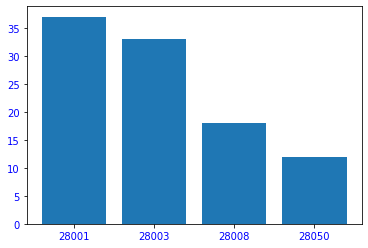

In [55]:
import matplotlib.pyplot as plt

height = final.Score
 
# Choose the names of the bars
bars = ('28001','28003','28008','28050')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, color='blue')
plt.yticks(color='blue')
 
# Show graphic
plt.show()
